In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
a = np.load('pose_result__data_paper_180918_MDN_PR_Fly1_001_SG1_behData_images.pkl')
data = a['points3d'].copy()
print('The dimension is ')
print(data.shape)
t = np.linspace(0,9,900)
data.T.shape

The dimension is 
(899, 38, 3)


(3, 38, 899)

In [14]:
4.882 - 3.1416*2

-1.4012000000000002

In [15]:
def rotaMatr(v1,v2):
    u = np.cross(v1,v2)
    u = u/np.linalg.norm(u)
    th = intersection_angle(v1,v2)
    r = np.zeros((3,3))
    c = np.cos(th)
    s = np.sin(th)
    ux = u[0]
    uy = u[1]
    uz = u[2]
    r[0,0] = c + ux**2*(1-c)
    r[0,1] = ux*uy*(1-c) - uz*s
    r[0,2] = ux*uz*(1-c) + uy*s
    
    r[1,0] = ux*uy*(1-c) + uz*s
    r[1,1] = c + uy**2*(1-c)
    r[1,2] = uy*uz*(1-c) - ux*s
    
    r[2,0] = uz*ux*(1-c) - uy*s
    r[2,1] = uz*uy*(1-c) + ux*s
    r[2,2] = c + uz**2*(1-c)
    return r
def rotaVD(vector,dif):
    u = vector/np.linalg.norm(vector)
    th = dif
    r = np.zeros((3,3))
    c = np.cos(th)
    s = np.sin(th)
    ux = u[0]
    uy = u[1]
    uz = u[2]
    r[0,0] = c + ux**2*(1-c)
    r[0,1] = ux*uy*(1-c) - uz*s
    r[0,2] = ux*uz*(1-c) + uy*s
    
    r[1,0] = ux*uy*(1-c) + uz*s
    r[1,1] = c + uy**2*(1-c)
    r[1,2] = uy*uz*(1-c) - ux*s
    
    r[2,0] = uz*ux*(1-c) - uy*s
    r[2,1] = uz*uy*(1-c) + ux*s
    r[2,2] = c + uz**2*(1-c)
    return r
def leg_inner(data, t, leg, pos):   
    '''pos = 1,2,3  t = 0 , leg = 0, 5, 10,       19, 24, 29'''
    ex_point = data[t,leg+pos,:]
    pre_point = data[t,leg+pos-1,:]
    next_point = data[t,leg+pos+1,:]
    pre_v = ex_point - pre_point
    nxt_v = next_point - ex_point
    return intersection_angle(pre_v, nxt_v)
def leg_len(data, t, leg, pos):
    '''pos = 0,1,2,3  t = 0 , leg = left:0, 5, 10,  right:19, 24, 29'''
    ex_point = data[t,leg+pos,:]
    next_point = data[t,leg+pos+1,:]
    nxt_v = next_point - ex_point
    return np.linalg.norm(nxt_v)

def thr_p(pl,pc,pr):
    v1 = pl - pc;
    v2 = pr - pc;
    return intersection_angle(v1, v2)
def intersection_angle(a,b):
    return np.arccos(a@b/np.linalg.norm(a)/np.linalg.norm(b))
def ag2(angle):
    return angle/np.pi*180

def set_coord():
    v_ref = np.array([0,0,1])
    v1 = data[0,0,:] - data[0,19,:]
    v2 = data[0,5,:] - data[0,24,:]
    v3 = data[0,10,:] - data[0,29,:]
    v4 = data[0,15,:] - data[0,34,:]
    print(ag2(intersection_angle(v_ref,v1)))
    print(ag2(intersection_angle(v_ref,v2)))
    print(ag2(intersection_angle(v_ref,v3)))
    print(ag2(intersection_angle(v_ref,v4)))
    xx = v1+v2+v3+v4
    x_ref = xx/np.linalg.norm(xx)
    print(x_ref)
    x_ref[1] = 0
    print(x_ref)
    print('x-axis angel: ',ag2(intersection_angle(v_ref,x_ref)))
    return x_ref
coord_x = set_coord()
#an = 38/180*np.pi
#x_ref = np.array([np.sin(an),0,np.cos(an)])
#print(x_ref)

#coord_x = x_ref
coord_y = np.array([0,-1,0])
coord_z = np.cross(coord_x,coord_y)
print('left-coordinate x :', coord_x)
print('left-coordinate y :', coord_y)
print('left-coordinate z :', coord_z)

39.719173687676225
37.766569550937106
40.96779343467542
38.55254876567842
[0.62771434 0.07004704 0.77528583]
[0.62771434 0.         0.77528583]
x-axis angel:  38.99554730142681
left-coordinate x : [0.62771434 0.         0.77528583]
left-coordinate y : [ 0 -1  0]
left-coordinate z : [ 0.77528583  0.         -0.62771434]


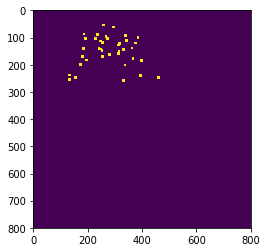

In [16]:
def views(data,t,sch1,sch2):
    '''meaningful input: top view:(0,2)  left view:(1,0)  front view:(1,2)'''
    mapp = np.zeros((800,800))
    for i in range(data.shape[1]):#set(range(0,34))-set(range(15,19)):#range(0,34):#data.shape[1]):  #  [0,5,19,24,10,29,15,34]:
        for j in range(-5,5):
            for k in range(-5,5):
                mapp[int(100*data[t,i,sch1]+300)+j,int(300+100*data[t,i,sch2])+k] = 10
    plt.imshow(mapp)
    #cv2.imshow('projection',mapp)
    #cv2.waitKey(10)

#views(0,2)

R_std = rotaMatr(coord_x,np.array([0,0,1]))
std_data = np.zeros(data.shape)
for i in range(899):
    std_data[i,:,:] = (R_std @ (data[i,:].T)).T
views(std_data,0,0,2)
for i in range(899):
    views(std_data,i,1,2)
tri = np.mean(std_data,axis=1)[0]-std_data[0]
tri[:,1] = std_data[0,:,1]
tri = tri.reshape(1,38,3)

#views(tri,0,1,0)

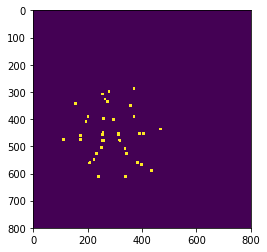

In [17]:
views(std_data,0,0,2)

In [18]:
length = np.zeros((1,24))
for t in range(0,1):
    i = 0
    for leg in [0,5,10,19,24,29]:
        for pos in range(4):
            length[t,i+pos] = leg_len(data,t,leg,pos)
        i += 4
        
for t in range(0,1):
    i = 0
    for leg in [0,5,10,19,24,29]:
        if(leg == 19): print('\n')
        print('leg ',leg)
        for pos in range(4):

            print(length[t,i+pos],'\t')
        i += 4

leg  0
0.4140395689922088 	
0.6834313211354136 	
0.5965678647359476 	
0.7008085946938519 	
leg  5
0.31111482309465965 	
0.8950070660764843 	
0.8260689993657889 	
0.8899131593030334 	
leg  10
0.3022583021135213 	
0.9196839265108279 	
0.9020544408440511 	
0.8807835090340419 	


leg  19
0.4313949865614194 	
0.7338953002532271 	
0.5835228119934599 	
0.6876515206709799 	
leg  24
0.3120475759381852 	
0.9702279278407753 	
0.8055189412119721 	
0.8998878948957555 	
leg  29
0.3035670546208364 	
0.9452870186086477 	
0.826829770413402 	
0.9966675196551372 	


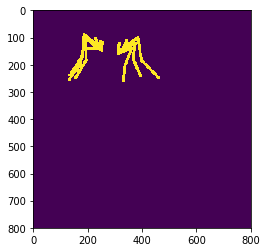

In [19]:
def interpolation(data, t, leg, pos, num):
    '''pos = 0,1,2,3  t = 0 , leg = left:0, 5, 10,  right:19, 24, 29'''
    ex_point = data[t,leg+pos,:].reshape(1,3)
    next_point = data[t,leg+pos+1,:].reshape(1,3)
    lam = np.linspace(0,1,num).reshape(num,1)
    enlarge_leg = lam * ex_point + (1 - lam) * next_point
    return enlarge_leg
def views_line(data,t,sch1,sch2):
    '''meaningful input: top view:(0,2)  left view:(1,0)  front view:(1,2)'''
    mapp = np.zeros((800,800))
    for i in range(0,data.shape[1]):  #  [0,5,19,24,10,29,15,34]:
        for j in range(-3,3):
            for k in range(-3,3):
                mapp[int(100*data[t,i,sch1]+300)+j,int(300+100*data[t,i,sch2])+k] = 10
    plt.imshow(mapp)
    #cv2.imshow('projection view',mapp)
    #cv2.waitKey(10)

num = 15
enlarge_leg = np.zeros((899,24,num,3))
for t in range(0,899):
    i = 0
    for leg in [0,5,10,19,24,29]:
        for pos in range(4):
            enlarge_leg[t,i+pos,:,:] = interpolation(std_data,t,leg,pos,num)
        i += 4
larg_leg = enlarge_leg.reshape(899,24*num,3)
for i in range(899):
    views(larg_leg,i,1,2)

In [21]:
rec.shape

NameError: name 'rec' is not defined

In [33]:
angle18 = angle_data3[0,:]
root = np.zeros(3)
leg1 = np.zeros(3)
#for i,j in enumerate([0,5,10,19,24,29]):
root_lf = std_data[0,0]
#views(root.reshape(1,6,3),0,0,2)
#for i,j in enumerate([0,3,6,9,12,15]):
leg1[0] = np.cos(angle18[1]) * np.sin(-angle18[0])
leg1[1] = np.sin(-angle18[1]) 
leg1[2] = np.cos(angle18[1]) * np.cos(angle18[0])
leg1 = leg1 * length[0,0]
joint1_lf = leg1 + root
R12 = RotaVD()


array([-0.43966135,  0.89139491, -0.1100591 ])

In [31]:
ag2(angle18)

array([ 104.05387503,  -63.04905775,  149.53530636,  164.33947697,
        -82.76834569,  144.9393636 ,   99.81749814,  -76.86026153,
         49.60149748, -129.07948048,  -50.55563715,  177.32200285,
       -158.10426582,  -81.36573525, -143.08286323, -117.54054351,
        -75.58345524,  -74.3665492 ])

In [23]:
angle_data1 = np.zeros((899,18))
angle_data3 = np.zeros((899,18))
def leg_1dof(t):
    i = 0
    for leg in [0,5,10,19,24,29]:
        #if(leg == 0 ): print('Left leg')
        #elif(leg == 19 ): print('Right leg')
        for pos in range(1,4):
            if(pos == 2):
                angle_data1[t,i+pos-1] = -leg_inner(data,t=t,leg=leg,pos=pos)
                #print(ag2(angle_data1[0,i+pos-1]))
            else:
                angle_data1[t,i+pos-1] = leg_inner(data,t=t,leg=leg,pos=pos)
                #print(ag2(angle_data1[0,i+pos-1]))
        i+=3
        #print('\n')
for i in range(899):        
    leg_1dof(i)
angle_data1

array([[ 2.05307146, -1.41059424,  0.44598874, ...,  2.18939718,
        -2.18443594,  0.68695063],
       [ 2.05307146, -1.42735261,  0.51868172, ...,  2.14447528,
        -2.13677149,  0.60375207],
       [ 2.06677054, -1.42735261,  0.53256001, ...,  2.15539072,
        -2.15116469,  0.60662776],
       ...,
       [ 2.52916757, -2.21701623,  0.59501483, ...,  1.85301046,
        -1.89492334,  0.58780548],
       [ 2.52916757, -2.21701623,  0.59501483, ...,  1.85301046,
        -1.89492334,  0.58780548],
       [ 2.52916757, -2.21701623,  0.59501483, ...,  1.88010082,
        -1.88838161,  0.6177853 ]])

151.37213293735795

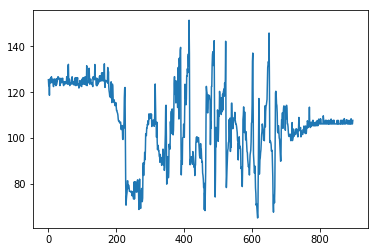

In [24]:
test = ag2(angle_data1[:,15])
plt.plot(test)
test.max()

In [25]:
def leg_3dof(t):
    #global dif
    j = 0
    for i in [0,5,10,19,24,29]:
        #if(i == 0):
            #print('Left')
        #elif(i == 19):
            #print('Right')
        if(i == 0 or i == 5 or i ==10):
            lrcoord_z = coord_z;
            lrcoord_x = coord_x;
        else:
            lrcoord_z = -coord_z;
            lrcoord_x = -coord_x;
        lrcoord_y = coord_y 
        x_r = data[t,i+1,:] - data[t,i+0,:]
        xr_proj = x_r.copy()
        xr_y = xr_proj[1]
        xr_proj[1] = 0;
        
        theta_z = intersection_angle(lrcoord_z, xr_proj)
        theta_x = intersection_angle(lrcoord_x, xr_proj)
        if(theta_z < np.pi/2):
            angle_1 = -theta_x
        else:
            angle_1 = theta_x
        #print('angle1')
        angle_data3[t,j] = angle_1
        #print(ag2(angle_1))
        angle_2 = np.pi/2 - intersection_angle(lrcoord_y,x_r)
        #print('angle2')
        angle_data3[t,j+1] = angle_2 
        #print(ag2(angle_2))
        
        y_slope = data[t,i+2,:] - data[t,i+1,:]
        #  how to make sure y_slope direction, Yes, sure
        z_r = np.cross(x_r, y_slope)
        R1 = rotaMatr(lrcoord_x, xr_proj)
        rel_coord_z = R1 @ lrcoord_z
        R2 = rotaMatr(xr_proj, x_r)
        rel_coord_y = R2 @ lrcoord_y
        #if(t == 0):
        #    theta3_y = intersection_angle(rel_coord_y, z_r)
        #    theta3_z = intersection_angle(rel_coord_z, z_r)
        #    if(theta3_y < np.pi/2):
        #        dif = -theta3_z
        #    else:
        #        dif = theta3_z
        #    Rx = rotaVD(x_r, dif)
        #    rel_coord_z = Rx @ rel_coord_z
        #    rel_coord_y = Rx @ rel_coord_y
        #    angle_3 = dif
        #else:
        #    Rx = rotaVD(x_r,dif)
        #    rel_coord_z = Rx @ rel_coord_z
        #    rel_coord_y = Rx @ rel_coord_y
        theta3_y = intersection_angle(rel_coord_y, z_r)
        theta3_z = intersection_angle(rel_coord_z, z_r)
        #print("theta3_y = ",ag2(theta3_y),"theta3_z = ",ag2(theta3_z))
        #print("sum = ",ag2(theta3_y+theta3_z), 'dif = ',ag2(theta3_y-theta3_z))
        if(theta3_y < np.pi/2):
            angle_3 = -theta3_z #+ dif
        else:
            angle_3 = theta3_z #+ dif
        #print('angle3')
        angle_data3[t,j+2] = angle_3
        #print(ag2(angle_3))
        #print('\n')
        j += 3
    return angle_1,angle_2,angle_3
dif = 0
for i in range(899):
    leg_3dof(i)
np.savetxt('angle_data1.txt',angle_data1,fmt='%.4f')
np.savetxt('angle_data3.txt',angle_data3,fmt='%.4f')
angle_data3[0]
copy = angle_data3.copy()

In [32]:
ag2(angle_data3[0,:])
angle_data3

array([[ 1.6590808 , -1.10041365,  2.60988344, ..., -2.20847141,
        -1.31918015, -1.29794114],
       [ 1.6590808 , -1.10041365,  2.60988344, ..., -2.12767848,
        -1.24777247, -1.17968106],
       [ 1.65888608, -1.08444621,  2.60534379, ..., -2.12767848,
        -1.24777247, -1.17553484],
       ...,
       [ 1.95861345, -0.94107222,  2.77082363, ..., -1.69023596,
        -1.24539989, -0.73319369],
       [ 1.95861345, -0.94107222,  2.77082363, ..., -1.69023596,
        -1.24539989, -0.73319369],
       [ 1.95861345, -0.94107222,  2.77082363, ..., -1.64449581,
        -1.3049018 , -0.68719584]])

62.91497326655729


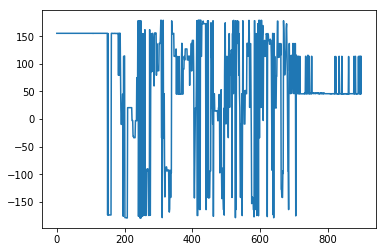

In [13]:
p = 3
tst = ag2(angle_data3[:,p])
plt.plot(tst)
avg = tst.mean()
print(avg)

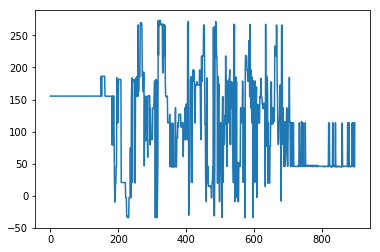

In [14]:
#print(ag2(chg))
#print(tst[np.where(tst-avg > 90)])
cp = angle_data3[:,p].copy()
cp[np.where(tst-avg > 120)] -= np.pi*2
#cp[np.where(tst > 200)] -= np.pi*2
cp[np.where(tst-avg < -100)] += np.pi*2
plt.plot(ag2(cp))

In [ ]:
angle_data3[:,p][np.where(tst-avg > 90)] -= np.pi*2
angle_data3[:,p][np.where(tst-avg < -90)] += np.pi*2

In [14]:
data2 = a['points2d']
def scheme2d(cam):
    mapp = np.zeros((800,800))
    for i in range(0,38):  #  [0,5,19,24,10,29,15,34]:
        for j in range(-5,5):
            for k in range(-5,5):
                mapp[int(100*data[0,i,sch1]+400)+j,int(400+100*data[0,i,sch2])+k] = 10
    plt.imshow(mapp)
for i in range(7):
    print(np.max(data2[i,:,:,0]))
    print(np.min(data2[i,:,:,0]))
    print('\n')
np.mean(data2[3,:,:,:])
# it is strange that data2[3] 3rd camera not works

930.0
0.0


922.5
0.0


795.0
0.0


0.0
0.0


720.0
0.0


922.5
0.0


952.5
0.0




0.0

In [13]:
from enum import Enum
import numpy as np
num_cameras = 7
class Tracked(Enum):
   BODY_COXA = 0
   COXA_FEMUR = 1
   FEMUR_TIBIA = 2
   TIBIA_TARSUS = 3
   TARSUS_TIP = 4

   ANTENNA = 5
   STRIPE = 6
  
    
tracked_points = [Tracked.BODY_COXA, Tracked.COXA_FEMUR, Tracked.FEMUR_TIBIA, Tracked.TIBIA_TARSUS, Tracked.TARSUS_TIP,
                 Tracked.BODY_COXA, Tracked.COXA_FEMUR, Tracked.FEMUR_TIBIA, Tracked.TIBIA_TARSUS, Tracked.TARSUS_TIP,
                 Tracked.BODY_COXA, Tracked.COXA_FEMUR, Tracked.FEMUR_TIBIA, Tracked.TIBIA_TARSUS, Tracked.TARSUS_TIP,
                 Tracked.ANTENNA,
                 Tracked.STRIPE, Tracked.STRIPE, Tracked.STRIPE,
                  
                  
                 Tracked.BODY_COXA, Tracked.COXA_FEMUR, Tracked.FEMUR_TIBIA, Tracked.TIBIA_TARSUS, Tracked.TARSUS_TIP,
                 Tracked.BODY_COXA, Tracked.COXA_FEMUR, Tracked.FEMUR_TIBIA, Tracked.TIBIA_TARSUS, Tracked.TARSUS_TIP,
                 Tracked.BODY_COXA, Tracked.COXA_FEMUR, Tracked.FEMUR_TIBIA, Tracked.TIBIA_TARSUS, Tracked.TARSUS_TIP,
                 Tracked.ANTENNA,
                 Tracked.STRIPE, Tracked.STRIPE, Tracked.STRIPE]

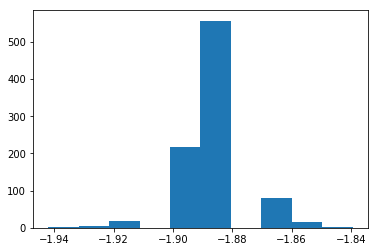

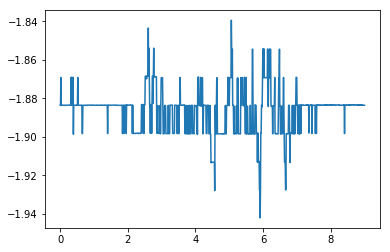

In [21]:
body_coxa0 = data[:,0,1]
t = np.linspace(0,9,899)

# number of positions statistics
fig = plt.figure()
axe = plt.axes()
axe.hist(body_coxa0)

# position VS. time
fig2 = plt.figure()
axe = plt.axes()
axe.plot(t,body_coxa0)
